# SALARY PRACTICE PROJECT

In [190]:
import pandas as pd
import numpy as np

In [191]:
df=pd.read_csv("practiceproject1_salary")

In [192]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


EDA PROCESS

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [194]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [195]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

NO NULL VALUES ARE PRESENT, HENCE NO NEED FOR SIMPLE IMPUTING OR OTHER METHODS LIKE REPLACE TO FILL UP THE NULL VALUES

TO CHECK THE TOP 5 ROWS 

In [196]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


TO CHECK THE BOTTOM 5 ROWS 

In [197]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


CHECKING A SAMPLE ROW 

In [198]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
210,AsstProf,B,4,3,Male,91000


In [199]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [200]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


SINCE ONLY 3 COLUMNS HAVE NUMERICAL VALUES, WE HAVE TAKEN A FULL SUMMARY OF THE SAME:
    1.IF WE COMPARE THE MEAN AND 50th PERCENTILE OF ALL 3 COLUMNS, THE MEAN IS GREATER THAN THE MEDIAN IN ALL 3 CASES WHCH MEAN THE DATA IS SLIGHTLY SKEWED TO THE RIGHT. THE 3rd COLUMN IS THE TARGET COLUMN ITSELF SO WE WILL KEEP IT THE SAME AND WORK ON THE OTHER 2 COLUMNS LATER 
    2.THE DIFFERENCE BETWEEN 75th PERCENTILE AND MAX FIGURES ARE HIGH WHICH MAY REFLECT SOME PRESENCE OF OUTLIERS


VISUALISING THE CATEGORICAL DATA: 

FOR CATEGORICAL ORDINAL DATA WE WILL USE SCATTER PLOTS (RANK) & (DISCIPLINE) WRT TO SALARY

In [201]:
import seaborn as sns

In [202]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

<AxesSubplot:xlabel='rank', ylabel='salary'>

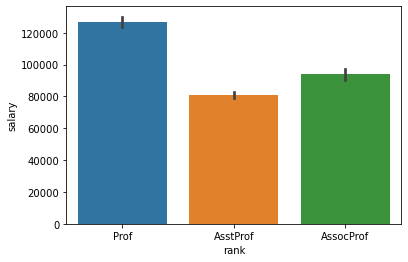

In [203]:
sns.barplot(x='rank',y='salary',data=df)

PROF CATEGORY RECORDS THE HIGHEST SALARY FOLLOWED BY ASSOC PROF AND THEN BY ASST PROF RANK 

In [204]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

<AxesSubplot:xlabel='discipline', ylabel='salary'>

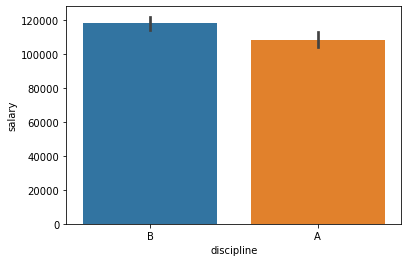

In [205]:
sns.barplot(x='discipline',y='salary',data=df)

HIGHEST SALARY OF DISCIPLINE B IS GREATEN THAN THAT OF DISCIPLINE A 

CATEGORICAL DATA -NOMINAL (SEX COLUMN)- WE WILL USE COUNTPLOT AS IT HELPS TO GIVE THE FREQUENCY OF THE CLASSES

In [206]:
df['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

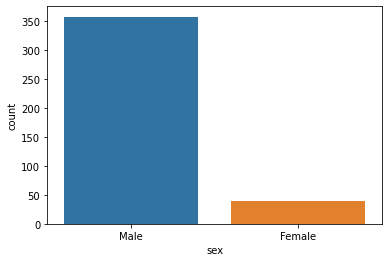

In [207]:
sns.countplot(x='sex',data=df)

DATA VISULAIZATION FOR CONINUOUS DATA

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

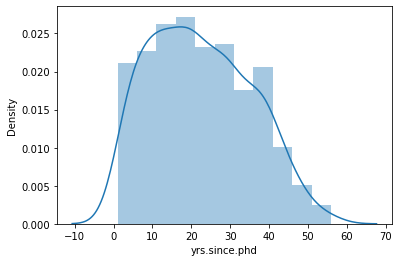

In [208]:
sns.distplot(df['yrs.since.phd'],kde=True)

Data is normally distributed

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

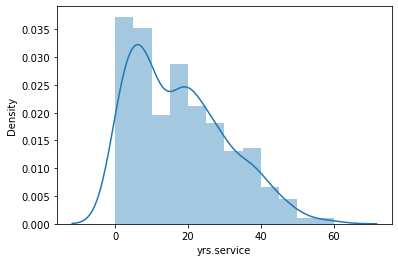

In [209]:
sns.distplot(df['yrs.service'],kde=True)

Data is more or less normally distributed

<AxesSubplot:xlabel='salary', ylabel='Density'>

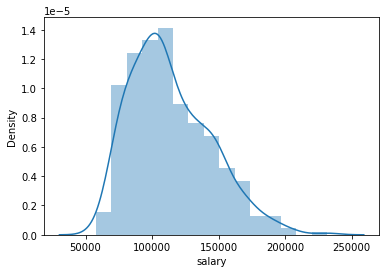

In [210]:
sns.distplot(df['salary'],kde=True)

Data is more or less normally distributed

SINCE 3 COLUMNS HAVE STRING DATA WE WILL CONVERT THEM TO NUMERICAL VALUES USING ENCODING TECHNIQUES

In [211]:
import sklearn

In [212]:
from sklearn.preprocessing import LabelEncoder

SINCE COLUMNS 'RANK','DISCIPLINE' AND 'SEX' HAVE CATEGORICAL VALUES, WE WILL SWITCH THEM TO NUMERICAL ONES USING LABEL ENCODER

In [213]:
le=LabelEncoder()

In [214]:
df['rank']=le.fit_transform(df['rank'])

In [215]:
df['discipline']=le.fit_transform(df['discipline'])

In [216]:
df['sex']=le.fit_transform(df['sex'])

In [217]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


CORRELATION OF THE INPUT COLUMNS WRT TO THE TARGET COLUMN 

In [218]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

CORRELATION WRT TO VARIOUS INPUT COLUMNS

In [219]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [220]:
import matplotlib.pyplot as plt

<AxesSubplot:>

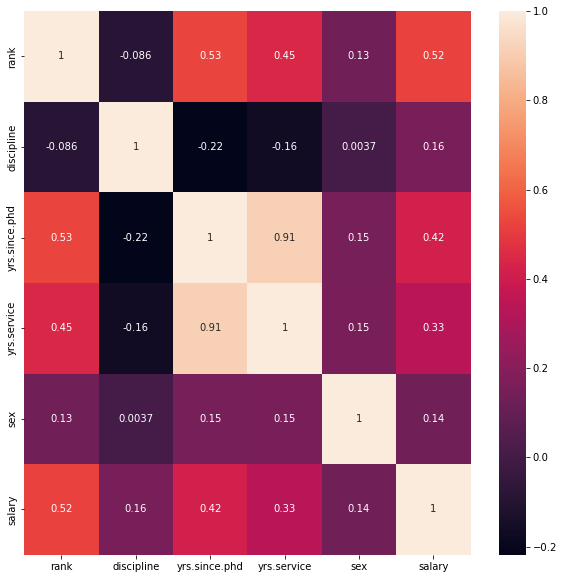

In [221]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

NO CONCEPT OF MUTICOLINEARITY AS ONLY 2 COLUMNS(YEARS SINCE PHD & YEARS OF SERVICE) ARE HIGHLY CORRELATED WITH EACH OTHER AND THE OTHERS FALL BELOW +-0.50 RANGE 

OUTLIERS CHECK

<AxesSubplot:xlabel='rank'>

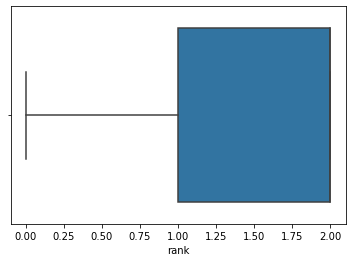

In [222]:
sns.boxplot(df['rank'])

<AxesSubplot:xlabel='discipline'>

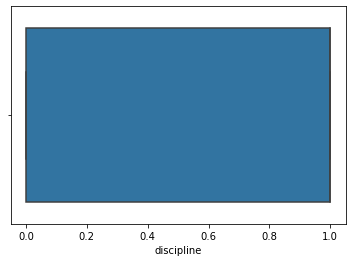

In [223]:
sns.boxplot(df['discipline'])

<AxesSubplot:xlabel='yrs.since.phd'>

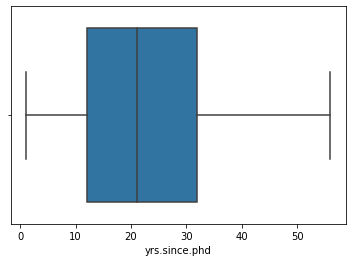

In [224]:
sns.boxplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service'>

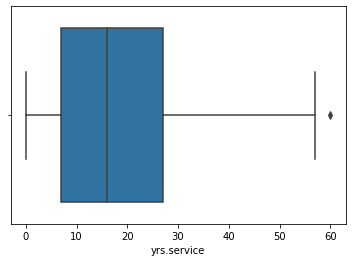

In [225]:
sns.boxplot(df['yrs.service'])

<AxesSubplot:xlabel='sex'>

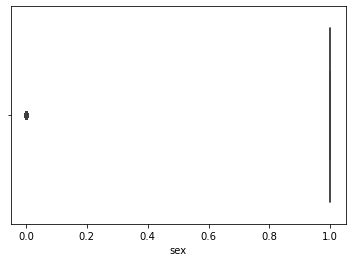

In [226]:
sns.boxplot(df['sex'])

In [227]:
import scipy.stats
from scipy.stats import zscore

In [228]:
z=np.abs(zscore(df))

In [229]:
z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.649257,0.915403,0.257550,0.029669,0.330058,0.860919
1,0.649257,0.915403,0.179854,0.124300,0.330058,1.966672
2,0.672564,0.915403,1.422982,1.125098,0.330058,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.330058,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.330058,0.918768
...,...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.330058,0.350418
393,0.649257,1.092415,0.674796,0.106654,0.330058,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.330058,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.330058,0.607502


In [230]:
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [231]:
newdf=df[(z<3).all(axis=1)]

In [232]:
newdf

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


DATA LOSS PERCENTAGE

In [233]:
(397-354)/397

0.10831234256926953

ITS MORE THAN THE DESIRED 10% RANGE, IF WE DO THIS THEN WE WILL BE REMOVING THE DETAILS WHICH WILL GIVE US THE ACCURACY IN THE MODEL, HENCE WE ARE NOT GOING AHEAD WITH THIS 

THE COLUMNS WHICH SHOW CASED OUTLIERS ARE SEX AND YEARS SINCE PHD, SINCE SEX COLUMN IS A CATEGORICAL COLUMN ANY WAY THIS ADDS MORE TO OUR ARGUMENT OF NOT REMOVING THE OUTLEIRS 

In [234]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

OUR FAVORABLE RANGE IN (+-0.50) 
1.RANK & SEX COLUMNS ARE CATEGORICAL IN NATURE THEREFORE WE CCANNOT REMOVE SKEWNESS FROM THE SAME EVEN THOUGH THEIR SKEWNESS IS HIGH
2.YEARS SINCE PHD SHOWS SKEWNESS WITHIN THE RANGE
3.YEARS OF SERVICE IS SLIGHLY OUT OF THE DESIRED RANGE
4.SALARY IS THE TARGET COLUMN

SPLITTING THE DATA INTO X & Y 

In [281]:
dd=pd.DataFrame(data=df)

In [282]:
x=dd.iloc[:,0:5]

In [295]:
y=dd.iloc[:,-1]

SCALING THE DATA - USING MIXMAXSCALER

In [296]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [297]:
scale=StandardScaler()

In [298]:
x=scale.fit_transform(x)

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [300]:
lr=LinearRegression()

In [345]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predr=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', r2_score(y_train,predr))
    print('At random_state' ,{i}, 'the testing accuracy test is', r2_score(y_test,pred))
    print('\n')

At random_state {0} the training accuracy test is 0.3611999954853077
At random_state {0} the testing accuracy test is 0.40792583149752315


At random_state {1} the training accuracy test is 0.3604245854198437
At random_state {1} the testing accuracy test is 0.41633641876629435


At random_state {2} the training accuracy test is 0.37547390964955596
At random_state {2} the testing accuracy test is 0.36001895545266904


At random_state {3} the training accuracy test is 0.3847313825130594
At random_state {3} the testing accuracy test is 0.329352987501087


At random_state {4} the training accuracy test is 0.38517450334380454
At random_state {4} the testing accuracy test is 0.30440081333156166


At random_state {5} the training accuracy test is 0.3950033630150771
At random_state {5} the testing accuracy test is 0.2752907752774737


At random_state {6} the training accuracy test is 0.3650308031752798
At random_state {6} the testing accuracy test is 0.40189870806075645


At random_state {7} t

In [347]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=80)

In [427]:
LR=LinearRegression()

In [428]:
LR.fit(x_train,y_train)

LinearRegression()

In [429]:
pre=LR.predict(x_test)

In [430]:
r2_score(y_test,pre)

0.5086207408821508

SVM REGRESSOR

In [351]:
svc=SVC()

In [352]:
dct={'kernel':['poly','rbf','linear'],'gamma':['scale','auto','float'],'decision_function_shape':['ovo','ovr']}

In [382]:
gr=GridSearchCV(svc,dct,cv=5)

In [383]:
gr.fit(x,y)

GridSearchCV(cv=5,
             estimator=SVC(decision_function_shape='ovo', gamma='auto',
                           kernel='poly'),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 'float'],
                         'kernel': ['poly', 'rbf', 'linear']})

In [384]:
gr.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'poly'}

In [422]:
SVC=SVC(kernel='poly',gamma='auto',decision_function_shape='ovo')

In [423]:
SVC.fit(x_train,y_train)

SVC(decision_function_shape='ovo', gamma='auto', kernel='poly')

In [424]:
prsvc=SVC.predict(x_test)

In [425]:
r2_score(y_test,prsvc)

-0.2409399258322371

KNN REGRESSOR

In [363]:
from sklearn.neighbors import KNeighborsRegressor

In [366]:
knn=KNeighborsRegressor()

In [367]:
dict2={'n_neighbors':[5,6,7],'algorithm':['auto','ball_tree','kd_tree','brute']}

In [370]:
gf=GridSearchCV(knn,dict2,cv=5)

In [371]:
gf.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 6, 7]})

In [372]:
gf.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7}

In [418]:
KNN=KNeighborsRegressor(n_neighbors=7,algorithm='ball_tree')

In [419]:
KNN.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7)

In [420]:
prknn=KNN.predict(x_test)

In [421]:
r2_score(y_test,prknn)

0.43227133135227125

DECISION TREE REGRESSOR

In [378]:
from sklearn.tree import DecisionTreeRegressor

In [379]:
dtc=DecisionTreeRegressor()

In [396]:
dict3={'criterion':['squared_error','friedman_mse', 'absolute_error','poisson'],'splitter':['best','random'],'max_features':['auto','log2','sqrt']}

In [397]:
gdt=GridSearchCV(dtc,dict3,cv=5)

In [398]:
gdt.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'splitter': ['best', 'random']})

In [399]:
gdt.best_params_

{'criterion': 'absolute_error', 'max_features': 'log2', 'splitter': 'random'}

In [414]:
DTC=DecisionTreeRegressor(criterion='absolute_error',max_features='log2',splitter='random')

In [415]:
DTC.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_features='log2',
                      splitter='random')

In [416]:
prdtc=DTC.predict(x_test)

In [417]:
r2_score(y_test,prdtc)

-0.07485052126612213

CROSS VAL SCORE OF THE MODELS 

In [405]:
from sklearn.model_selection import cross_val_score

In [432]:
for m in [LR,DTC,KNN,SVC]:
    cv=cross_val_score(m,x,y,cv=5)
    print('CV','is',(cv.mean()))

CV is 0.29569928663871725
CV is 0.16834937604714756
CV is 0.3867526312447921
CV is 0.027784810126582276


REGULARIZATION